<a href="https://colab.research.google.com/github/kej534923-maker/ECON5200-Applied-Data-Analytics/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install the FRED API library
!pip install fredapi

In [3]:
# Install the FRED API library
!pip install fredapi

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='7dd942492765c007c08ef8a8e1e49c6b')

In [4]:
# 1. Fetch the data series
print("7dd942492765c007c08ef8a8e1e49c6b")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

7dd942492765c007c08ef8a8e1e49c6b
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [5]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


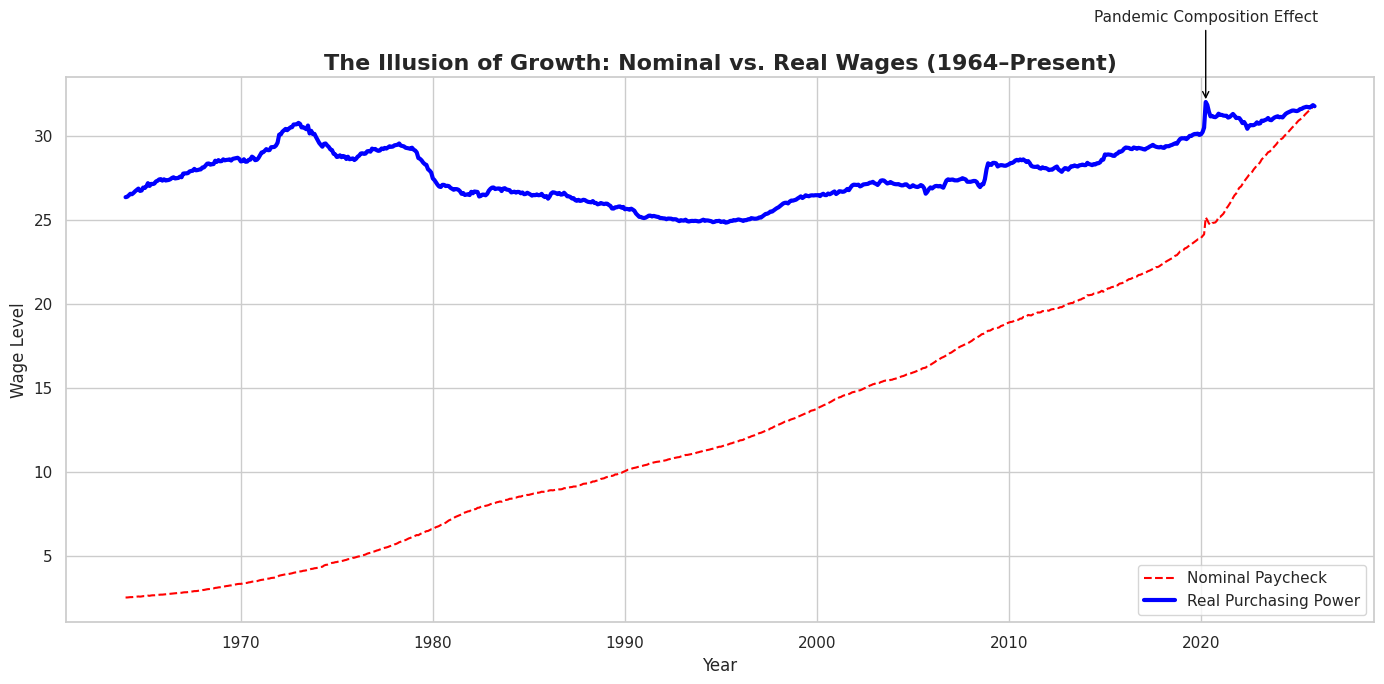

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Style ---
sns.set_theme(style="whitegrid")

# --- Create figure ---
fig, ax = plt.subplots(figsize=(14, 7))

# --- Plot time series ---
ax.plot(
    df.index,
    df['Nominal_Wage'],
    linestyle='--',
    color='red',
    label='Nominal Paycheck'
)

ax.plot(
    df.index,
    df['Real_Wage'],
    linewidth=3,
    color='blue',
    label='Real Purchasing Power'
)

# --- Title ---
ax.set_title(
    'The Illusion of Growth: Nominal vs. Real Wages (1964–Present)',
    fontsize=16,
    weight='bold'
)

# --- Labels ---
ax.set_xlabel('Year')
ax.set_ylabel('Wage Level')

# --- Legend ---
ax.legend()

# --- Annotation: 2020 Real Wage Spike ---
real_2020 = df.loc['2020', 'Real_Wage']
spike_date = real_2020.idxmax()
spike_value = real_2020.max()

ax.annotate(
    'Pandemic Composition Effect',
    xy=(spike_date, spike_value),
    xytext=(spike_date, spike_value * 1.15),
    arrowprops=dict(arrowstyle='->', color='black'),
    fontsize=11,
    ha='center'
)

# --- Tight layout ---
plt.tight_layout()
plt.show()


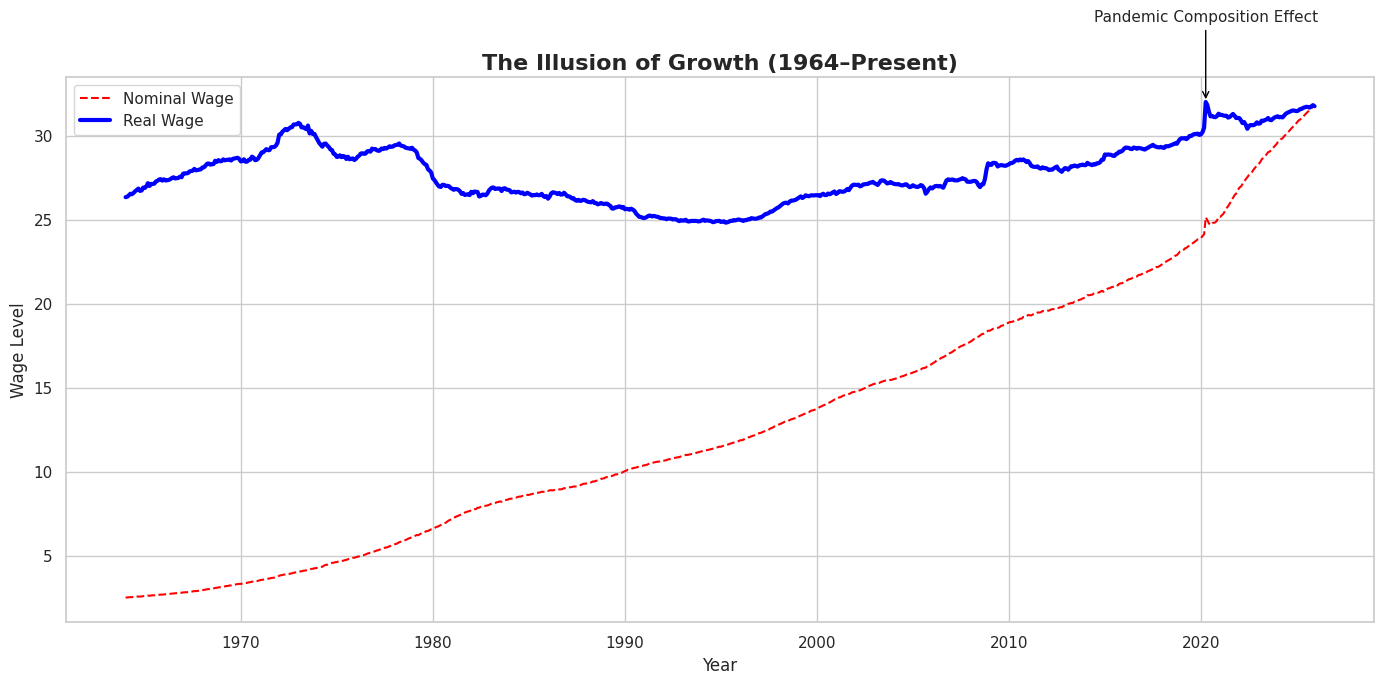

In [8]:
import matplotlib.pyplot as plt

# --- Create figure ---
plt.figure(figsize=(14, 7))

# --- Plot lines ---
plt.plot(
    df.index,
    df['Nominal_Wage'],
    linestyle='--',
    color='red',
    label='Nominal Wage'
)

plt.plot(
    df.index,
    df['Real_Wage'],
    linestyle='-',
    color='blue',
    linewidth=3,
    label='Real Wage'
)

# --- Title ---
plt.title(
    'The Illusion of Growth (1964–Present)',
    fontsize=16,
    fontweight='bold'
)

# --- Labels ---
plt.xlabel('Year')
plt.ylabel('Wage Level')

# --- Legend ---
plt.legend()

# --- Annotate 2020 spike ---
real_2020 = df.loc['2020', 'Real_Wage']
spike_date = real_2020.idxmax()
spike_value = real_2020.max()

plt.annotate(
    'Pandemic Composition Effect',
    xy=(spike_date, spike_value),
    xytext=(spike_date, spike_value * 1.15),
    arrowprops=dict(arrowstyle='->', color='black'),
    fontsize=11,
    ha='center'
)

# --- Show plot ---
plt.tight_layout()
plt.show()
